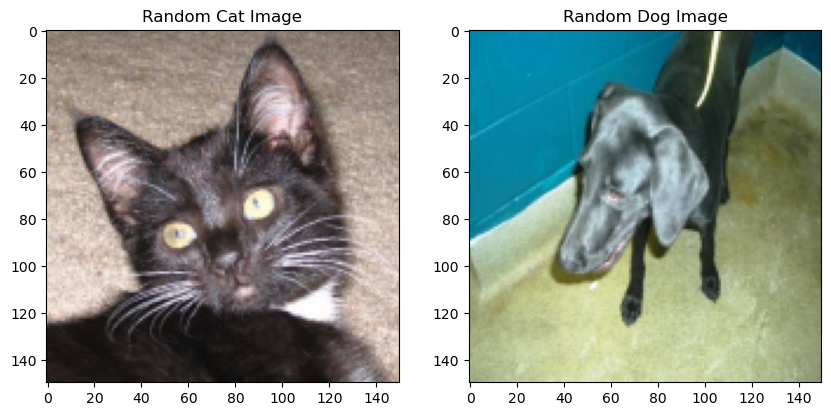

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from skimage import io
from skimage.transform import resize

np.random.seed(42)

cat_dir = './data/cats_and_dogs_filtered/train/cats/'
dog_dir = './data/cats_and_dogs_filtered/train/dogs/'

def load_images(directory, label, num_images=1000, target_size=(150, 150)):
    images = []
    labels = []
    for i in range(num_images):
        img_path = os.path.join(directory, f'{label}.{i}.jpg')
        image = io.imread(img_path)
        image_resized = resize(image, target_size, anti_aliasing=True)
        images.append(image_resized)
        labels.append(label)
    return np.array(images), np.array(labels)

cats, cat_labels = load_images(cat_dir, 'cat', 1000)
dogs, dog_labels = load_images(dog_dir, 'dog', 1000)

images = np.concatenate((cats, dogs), axis=0)
labels = np.concatenate((cat_labels, dog_labels), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cats[np.random.randint(0, 1000)])
ax[0].set_title("Random Cat Image")
ax[1].imshow(dogs[np.random.randint(0, 1000)])
ax[1].set_title("Random Dog Image")
plt.show()

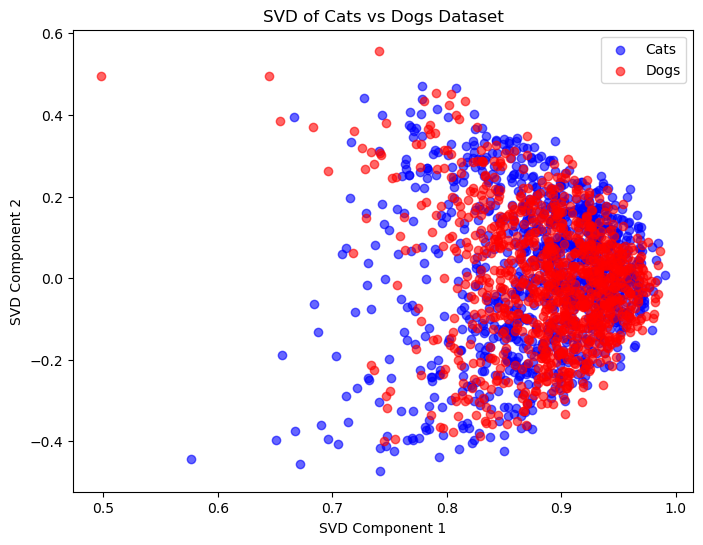

In [17]:
images_reshaped = images.reshape(images.shape[0], -1)

normalized_images = normalize(images_reshaped, axis=1)

svd = TruncatedSVD(n_components=2)
svd_components = svd.fit_transform(normalized_images)

plt.figure(figsize=(8, 6))
plt.scatter(svd_components[labels == 'cat', 0], svd_components[labels == 'cat', 1], c='b', label='Cats', alpha=0.6)
plt.scatter(svd_components[labels == 'dog', 0], svd_components[labels == 'dog', 1], c='r', label='Dogs', alpha=0.6)
plt.title('SVD of Cats vs Dogs Dataset')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend()
plt.show()

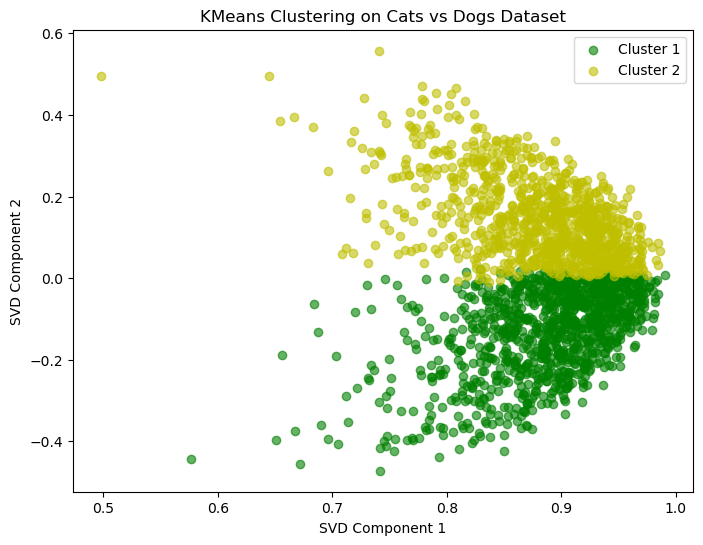

In [18]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_images)

plt.figure(figsize=(8, 6))
plt.scatter(svd_components[kmeans_labels == 0, 0], svd_components[kmeans_labels == 0, 1], c='g', label='Cluster 1', alpha=0.6)
plt.scatter(svd_components[kmeans_labels == 1, 0], svd_components[kmeans_labels == 1, 1], c='y', label='Cluster 2', alpha=0.6)
plt.title('KMeans Clustering on Cats vs Dogs Dataset')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend()
plt.show()

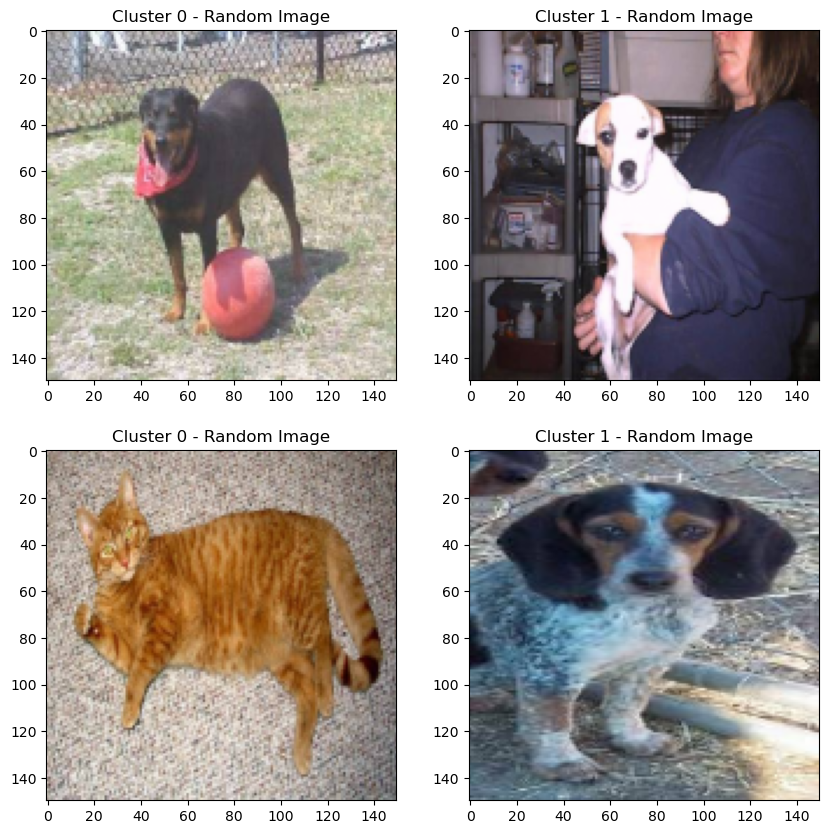

In [19]:
cluster_0_indices = np.where(kmeans_labels == 0)[0]
cluster_1_indices = np.where(kmeans_labels == 1)[0]

cluster_0_images = images[cluster_0_indices]
cluster_1_images = images[cluster_1_indices]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(cluster_0_images[np.random.randint(0, len(cluster_0_images))])
ax[0, 0].set_title("Cluster 0 - Random Image")
ax[0, 1].imshow(cluster_1_images[np.random.randint(0, len(cluster_1_images))])
ax[0, 1].set_title("Cluster 1 - Random Image")
ax[1, 0].imshow(cluster_0_images[np.random.randint(0, len(cluster_0_images))])
ax[1, 0].set_title("Cluster 0 - Random Image")
ax[1, 1].imshow(cluster_1_images[np.random.randint(0, len(cluster_1_images))])
ax[1, 1].set_title("Cluster 1 - Random Image")
plt.show()